In [408]:
import tensorflow as tf
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [409]:
if tf.test.gpu_device_name():
    print('Default GPU {}'.format(tf.test.gpu_device_name()))
else:    
    warnings.warns('NO GPU DETECTED')
    

Default GPU /gpu:0


In [410]:
data = pd.read_csv("data/test.txt", header=None, names=['id', 'application', 'gender', 'price'])
data.head()

,id,application,gender,price
0,1,3on3publishing.MummysClub,books,990
1,2,com.288vroom.poeiphone,books,990
2,3,com.3ight.LoveQuotesiPhone,books,0
3,4,com.amazon.Lassen,books,0
4,5,com.appbooks.animalia,books,2990


In [411]:
data_loc = pd.read_csv("data/traces/accel/accel.txt", header=None, names=['id','time_p', 'x', 'y', 'z'])
data_loc.head()

,id,time_p,x,y,z
0,D03,1283889270,-0.036224,0.000000,-1.068619
1,D03,1283889270,-0.036224,0.018112,-1.050507
2,D03,1283889270,-0.036224,0.036224,-1.050507
3,D03,1283889270,-0.036224,0.018112,-1.050507
4,D03,1283889270,-0.054337,0.018112,-1.068619


In [412]:
#print(len(data_loc))

    

In [413]:
pd.options.mode.chained_assignment = None 
X = data[['id', 'application', 'gender']].values
#print()
data.insert(3, 'type', 0)

In [414]:
def get_data_app(data):
    gender = data.gender
    names = {}
    gender_name = {}
    j = 2
    k = 0
    gender_id = {}
    for i in range(len(data)):
        name = data.application[i]
        if name not in names:
            names[name] = k
            k +=1
        gender = data.gender[i]    
        if gender not in gender_id:
            gender_id[gender] = j
            j +=1
        data.type[i] = int(gender_id[gender])
        gender_name[name] = gender_id[data.gender[i]]
    return gender_id, gender, names, k, gender_name

In [415]:
gender_id, gender, name_app, id_number, gender_n = get_data_app(data)
data.head()

,id,application,gender,type,price
0,1,3on3publishing.MummysClub,books,2,990
1,2,com.288vroom.poeiphone,books,2,990
2,3,com.3ight.LoveQuotesiPhone,books,2,0
3,4,com.amazon.Lassen,books,2,0
4,5,com.appbooks.animalia,books,2,2990


In [416]:
data0 = pd.read_csv('data/traces/appusage/D03_appusage.txt', header=None, names=['id','user_id' ,'application', 'time', 'duration'])
data0.insert(3, 'gender', 0)
data0.insert( 4, 'date', 0.0)
data0.insert( 5, 'day', 0)
data0.insert( 6, 'time_24h', 0.0)
data0.insert(7, 'hour_int', 0.0)
data0.insert(8, 'min_int', 0.0)
data0.insert(9, 'sec_int', 0.0)
data0.insert(10, 'day_int', 0)
data0.insert(11, 'x', 0.0)
data0.insert(12, 'y', 0.0)
data0.insert(13, 'z', 0.0)
data0.insert(14, 'channel', 0.0)
data0.insert(14, 'rate', 0.0)
data0.insert(15, 'rssi', 0.0)



data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,day_int,x,y,z,rate,rssi,channel,time,duration
0,847971,D03,com.apple.Preferences,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,847972,D03,SpringBoard,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,847973,D03,SpringBoard,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,847974,D03,SpringBoard,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,847975,D03,com.apple.mobileslideshow-Camera,0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [417]:
print(len(data0) )

33448


In [418]:
for i in range(len(data0)):
    name = data0.application[i]
    if name in gender_n:
        data0.gender[i] = gender_n[name]
    else:
        data0.gender[i] = 1
        
data0.gender[309:].head()

309    17
310     1
311     1
312     1
313    17
Name: gender, dtype: int64

In [419]:
data_power = pd.read_csv("data/traces/power/power.txt", header=None, names=['id', 'user_id', 'time', 'battery', 'mah', 'current', 'charging', 'charged'])
data0.insert(11, 'power', 0)
data0.insert(12, 'charging', 0)
data0.insert(13, 'charged', 0)


data_power.battery = [battery/100 for battery in data_power.battery]

data_power.head()

,id,user_id,time,battery,mah,current,charging,charged
0,10899805,D03,1283889274,0.26,3811,113,1,0
1,10899806,D03,1283890181,0.34,3861,268,1,0
2,10899807,D03,1283890201,0.34,3869,352,1,0
3,10899808,D03,1283890221,0.34,3870,349,1,0
4,10899809,D03,1283890241,0.34,3870,350,1,0


In [420]:
print(len(data0), len(data_power))

33448 244064


In [421]:
x_power = data_power[['time', 'battery', 'charging', 'charged']].values





In [422]:
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,847971,D03,com.apple.Preferences,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,847972,D03,SpringBoard,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,847973,D03,SpringBoard,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,847974,D03,SpringBoard,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,847975,D03,com.apple.mobileslideshow-Camera,1,0.0,0,0.0,0.0,0.0,0.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [423]:
date = data0.time 
duration = data0.duration
week_dic = {'Sunday': 1, 'Monday': 2, 'Tuesday': 3, 'Wednesday': 4, 'Thursday': 5, 'Friday': 6, 'Saturday':7}

#duration = [dur for dur in duration if dur < 0 dur:0]
time_ = [datetime.datetime.fromtimestamp(d) for d in date]
time = [str(times)[11:] for times in time_]
date_ = [str(times)[:11] for times in time_]
week_day = [datetime.datetime.strptime(str(day), '%Y-%M-%d ').strftime('%A') for day in date_]

time_int = [time_string.split(':') for time_string in time]
time_int_ = [int(''.join(time_scatter)) for time_scatter in time_int]

hour_int = [int(hour[0])/100  for hour in time_int]
min_int = [int(hour[1])/100  for hour in time_int]
sec_int = [int(hour[2])/100  for hour in time_int]

data0.hour_int = hour_int
data0.min_int = min_int
data0.sec_int = sec_int


data0.day_int = [week_dic[day] for day in week_day]
data0.day = week_day
data0.time_24h = time
data0.time_int = time_int_
number_sessions = {}
time_by_app = {}
avg_app_time = {}
length = len(name_app) + 1
data0.date = date_
id_number += 1


new_ids = {}
new_id = 1

for i in range(len(data0)):
        names = data0.application[i]      
        
        
        if names not in new_ids:
            new_ids[names] = new_id
            new_id +=1
       
        if names not in number_sessions:
            number_sessions[names] = 1
            time_by_app[names] = duration[i]
        else:
            number_sessions[names] += 1
            time_by_app[names] += duration[i]

data0.id = [new_ids[i] for i in data0.application]  

avg = [float(time_by_app[i])/float(number_sessions[i]) for i in time_by_app]  
j = 0
for name in number_sessions:
    avg_app_time[name] = avg[j]
    j += 1

#number_apps = len(data)    
    
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,0,D03,com.apple.Preferences,1,2010-09-08,Friday,05:45:18,0.05,0.45,0.18,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,1,D03,SpringBoard,1,2010-09-08,Friday,05:46:53,0.05,0.46,0.53,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,1,D03,SpringBoard,1,2010-09-08,Friday,08:19:12,0.08,0.19,0.12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,1,D03,SpringBoard,1,2010-09-08,Friday,10:41:08,0.10,0.41,0.08,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,2,D03,com.apple.mobileslideshow-Camera,1,2010-09-08,Friday,10:41:20,0.10,0.41,0.20,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [424]:
data0.hour_int = [int(time) for time in data0.hour_int]
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,0,D03,com.apple.Preferences,1,2010-09-08,Friday,05:45:18,0,0.45,0.18,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,1,D03,SpringBoard,1,2010-09-08,Friday,05:46:53,0,0.46,0.53,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,1,D03,SpringBoard,1,2010-09-08,Friday,08:19:12,0,0.19,0.12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,1,D03,SpringBoard,1,2010-09-08,Friday,10:41:08,0,0.41,0.08,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,2,D03,com.apple.mobileslideshow-Camera,1,2010-09-08,Friday,10:41:20,0,0.41,0.20,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [425]:
data_wifi = pd.read_csv("data/traces/wifi/availablewifi/wifi.txt", header=None, names=['id', 'time', 'ssid', 'bssid', 'channel', 'rate', 'rssi'])
data_wifi.rate  = [rate/100 for rate in data_wifi.rate]
data_wifi.rssi  = [-rs/100 for rs in data_wifi.rssi]
data_wifi.channel  = [ch/100 for ch in data_wifi.channel]

data_wifi.head()

,id,time,ssid,bssid,channel,rate,rssi
0,D03,2010-09-07 19:54:29,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.48,0.69
1,D03,2010-09-07 19:54:31,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.48,0.61
2,D03,2010-09-07 19:54:33,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.36,0.71
3,D03,2010-09-07 19:54:35,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.36,0.71
4,D03,2010-09-07 19:54:38,61480f2dd8b2ea4283ea321f915310b9,4a996556357f67003ddc16d40603be6b,0.11,0.18,0.67


In [426]:
data0.hour_int = [int(time) for time in data0.hour_int]
data_wi = data_wifi[['time', 'channel', 'rate', 'rssi']].values
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,0,D03,com.apple.Preferences,1,2010-09-08,Friday,05:45:18,0,0.45,0.18,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,1,D03,SpringBoard,1,2010-09-08,Friday,05:46:53,0,0.46,0.53,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,1,D03,SpringBoard,1,2010-09-08,Friday,08:19:12,0,0.19,0.12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,1,D03,SpringBoard,1,2010-09-08,Friday,10:41:08,0,0.41,0.08,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,2,D03,com.apple.mobileslideshow-Camera,1,2010-09-08,Friday,10:41:20,0,0.41,0.20,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [427]:
import time as ti


x_data = data0[['time','hour_int','min_int', 'day_int' ,'power','charging', 'charged','x', 'y', 'z', 'channel', 'rate', 'rssi']].values 
y_data = data_loc[['time_p', 'x', 'y', 'z']].values

length = len(data0)
start = 0
start_time = ti.time()
for i in range(length):
    for j in range(start, len(data_loc), 1):
        if x_data[i, 0] <= y_data[j, 0] + 899:
            x_data[i, 7:10] = y_data[j, 1:]/10
            break
        else:
            start += 1

x_power = data_power[['time', 'battery', 'charging', 'charged']].values
start = 0
for i in range(length):
    for k in range(start, len(data_power), 1):
        if x_data[i, 0] <= x_power[k, 0] + 59:
            x_data[i, 4:7] = x_power[k, 1:]
            break
        else:
            start += 1 
            
            

#d = str(data_wifi.time[0])
#time_str = [str(time) for time in data_wi[:, 0]]
#print(time_str[8])
#print(len(data0), len(data_wi))
#b = datetime.datetime.strptime(data_wifi.time[0], '%Y-%m-%d %H:%M:%S')
#print(data_wi[0,0])


In [428]:
start = 0
for i in range(length):
    for k in range(start, len(data_wi), 1):
        date_time = str(data_wi[k, 0])
        str_time = datetime.datetime.strptime(date_time, '%Y-%m-%d %H:%M:%S')
        #print(str_time.timestamp())
        int_time = int(str_time.timestamp())
        if x_data[i, 0] <= int_time + 300:
            x_data[i, 10:] = data_wi[k, 1:] 
            break           
        else:
            start += 1

np.savetxt('new', x_data, delimiter=',')  


In [429]:
def load_data(data, new_data, data_):
    X = new_data[['hour_int', 'day_int' ,'power','charging', 'charged','x', 'y', 'z', 'channel','rate', 'rssi']].values
    y = data[['id']].values
    labels = data_[['id']].values
   
    return X, y, labels




In [430]:
data0.head()

,id,user_id,application,gender,date,day,time_24h,hour_int,min_int,sec_int,...,charging,charged,x,y,z,rate,rssi,channel,time,duration
0,0,D03,com.apple.Preferences,1,2010-09-08,Friday,05:45:18,0,0.45,0.18,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892318,95
1,1,D03,SpringBoard,1,2010-09-08,Friday,05:46:53,0,0.46,0.53,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283892413,6
2,1,D03,SpringBoard,1,2010-09-08,Friday,08:19:12,0,0.19,0.12,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283901552,17
3,1,D03,SpringBoard,1,2010-09-08,Friday,10:41:08,0,0.41,0.08,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910068,12
4,2,D03,com.apple.mobileslideshow-Camera,1,2010-09-08,Friday,10:41:20,0,0.41,0.20,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1283910080,32


In [431]:
new_data = pd.read_csv("new", header=None, names=['time','hour_int','min_int', 'day_int' ,'power','charging', 'charged','x', 'y', 'z', 'channel', 'rate', 'rssi'])
new_data.head()

,time,hour_int,min_int,day_int,power,charging,charged,x,y,z,channel,rate,rssi
0,1.283892e+09,0.0,0.45,6.0,0.27,1.0,0.0,-0.005434,0.003622,-0.117729,0.06,0.54,0.42
1,1.283892e+09,0.0,0.46,6.0,0.27,1.0,0.0,-0.005434,0.003622,-0.117729,0.06,0.54,0.42
2,1.283902e+09,0.0,0.19,6.0,0.30,0.0,0.0,0.021735,-0.041658,-0.090561,0.06,0.54,0.42
3,1.283910e+09,0.0,0.41,6.0,0.20,0.0,0.0,-0.041658,-0.021735,-0.094183,0.06,0.54,0.42
4,1.283910e+09,0.0,0.41,6.0,0.20,0.0,0.0,-0.041658,-0.021735,-0.094183,0.06,0.54,0.42


In [432]:
gender_labels = data0.gender
X, Y, labels = load_data(data0, new_data, data)

In [450]:
length = len(Y)
Y_ = np.zeros((length, new_id))

for i in range(length):
    index = Y[i]
    if index != 0:
        Y_[i][index] = 1
    
print(Y_[-1], Y[-1])

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] [1]


In [358]:
print(np.max(gender_labels))

20


In [436]:
length = len(Y)
Y_g = np.zeros((length, np.max(gender_labels)))

for i in range(length):
    index = gender_labels[i] - 1  
    if index != 0:
        Y_g[i][index] = 1
    
        
    
print(Y_g)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [469]:


l = len(X)
div = l//20
div2 = div*2


#train_indices = np.random.choice(l, round(0.9*l), replace=False)
#test_indices = np.array(list(set(range(l)) - set(train_indices)))


train_indices = int(l * 0.9)
test_indices = train_indices + int((l - train_indices)/2)
#val_indices_ = l - train_indices - test_indices
#val_indices = np.array(list(test_indices))


#print(len(test_indices), len(train_indices) )
#Dividing data for testing, validation and training
X_te, Y_te = X[train_indices:test_indices], Y_[train_indices:test_indices]
X_val, Y_val = X[test_indices:], Y_[test_indices:]
X_tr, Y_tr = X[:train_indices], Y_[:train_indices]

#data info
print('X shape and Y shape                       {}, {}'.format(X.shape, Y_.shape))
print('X testing shape and Y testing shape       {}, {}'.format(X_te.shape, Y_te.shape))
print('X training shape and Y training shape     {}, {}'.format(X_tr.shape, Y_tr.shape))
print('X validation shape and Y validation shape {}, {}'.format(X_val.shape, Y_val.shape))

#print(X, Y)

X shape and Y shape                       (33448, 11), (33448, 69)
X testing shape and Y testing shape       (1672, 11), (1672, 69)
X training shape and Y training shape     (30103, 11), (30103, 69)
X validation shape and Y validation shape (1673, 11), (1673, 69)


In [534]:
tf.reset_default_graph()
sess = tf.Session()

batch_size = 512
n_inputs = len(X_tr[0])
n_classes = new_id
n_labels = int(labels[-1])
learning_rate = 0.002
dropout = 0.5
reg = 0.0005

x = tf.placeholder(dtype=tf.float32, shape=(None, n_inputs), name='Inputs')
y = tf.placeholder(dtype=tf.float32, shape=(None, n_classes), name='outputs')
seed = 3
np.random.seed(seed)
tf.set_random_seed(seed)
print(n_inputs, new_id)

11 69


In [535]:
print(X_te[0])

[  0.00000000e+00   6.00000000e+00   9.00000000e-01   1.00000000e+00
   0.00000000e+00  -1.81120000e-03  -5.43365000e-02  -9.41833000e-02
   1.00000000e-02   5.40000000e-01   7.40000000e-01]


In [536]:
def init_variable(shape):
    return tf.Variable(tf.random_normal(shape=shape, mean=0, stddev=(0.1)))

def logistic(input_layer, weight, bias, dropout, activ=True):
    layer_out = tf.add(tf.matmul(input_layer, weight), bias)
    
    if dropout>0:
        if activ:
            return (tf.nn.dropout(tf.nn.relu(layer_out), dropout))
        else:
            return tf.nn.dropout(layer_out, dropout)
    else:
        if not activ:
            return layer_out
        else:
            return (tf.nn.relu(layer_out))
    
 
    
    

In [537]:

# First layer

n_init_neurons = 1024

#create_network(n_inputs, n_init_neurons)
#init_layer = init_variable(shape=[n_inputs, 4096])
#init_layer_bias = init_variable(shape=[4096])
#logistic_init_layer = logistic(x, init_layer, init_layer_bias, dropout=0.75)

W_1 = init_variable(shape=[n_inputs, 2048])
b_1 = init_variable(shape=[2048])
h_1 = logistic(x, W_1, b_1, dropout=0.75)
h_1 = tf.layers.batch_normalization(h_1)
# Second layer
W_2 = init_variable(shape=[2048, 1024])
b_2 = init_variable(shape=[1024])
h_2 = logistic(h_1, W_2, b_2, dropout=0.75)
h_2 = tf.layers.batch_normalization(h_2)
# Third layer
W_3 = init_variable(shape=[1024,512])
b_3 = init_variable(shape=[512])
h_3 = logistic(h_2, W_3, b_3, dropout=0.5)
h_3 = tf.layers.batch_normalization(h_3)


W_4 = init_variable(shape=[512, 256])
b_4 = init_variable(shape=[256])
h_4 = logistic(h_3, W_4, b_4, dropout=0.5)
h_4 = tf.layers.batch_normalization(h_4)


W_5 = init_variable(shape=[256, 138])
b_5 = init_variable(shape=[138])
h_5 = logistic(h_4, W_5, b_5, dropout=0.5)
h_5 = tf.layers.batch_normalization(h_5)



W_6 = init_variable(shape=[138,138])
b_6 = init_variable(shape=[138])
h_6 = logistic(h_5, W_6, b_6, dropout=0.5)
h_6 = tf.layers.batch_normalization(h_6)


W_7 = init_variable(shape=[138, 138])
b_7 = init_variable(shape=[138])
h_7 = logistic(h_6, W_7, b_7, dropout=0.5)
h_7 = tf.layers.batch_normalization(h_7)

W_8 = init_variable(shape=[138, 138])
b_8 = init_variable(shape=[138])
h_8 = logistic(h_7, W_8, b_8, dropout=0.5)
h_8 = tf.layers.batch_normalization(h_8)

W_9 = init_variable(shape=[138, 138])
b_9 = init_variable(shape=[138])
h_9 = logistic(h_8, W_9, b_9, dropout=0.5)
h_9 = tf.layers.batch_normalization(h_9)

W_10 = init_variable(shape=[138, 138])
b_10 = init_variable(shape=[138])
h_10 = logistic(h_9, W_10, b_10, dropout=0.5)
h_10 = tf.layers.batch_normalization(h_10)


W_11 = init_variable(shape=[138, 138])
b_11 = init_variable(shape=[138])
h_11 = logistic(h_10, W_11, b_11, dropout=0)
h_11 = tf.layers.batch_normalization(h_11)


W_12 = init_variable(shape=[138, 138])
b_12 = init_variable(shape=[138])
h_12 = logistic(h_11, W_12, b_12, dropout=0)
h_12 = tf.layers.batch_normalization(h_12)


W_13 = init_variable(shape=[138, 138])
b_13 = init_variable(shape=[138])
h_13 = logistic(h_12, W_13, b_13, dropout=0)
h_13 = tf.layers.batch_normalization(h_13)

W_14 = init_variable(shape=[138, n_classes])
b_14 = init_variable(shape=[n_classes])
logits = logistic(h_13, W_14, b_14, dropout=0, activ=False)
logits =  tf.nn.softmax(logits)






#output_ = tf.argmax(output, axis=1)
#loss = tf.reduce_mean(tf.abs(y - output))
#loss = tf.reduce_sum(tf.pow(y - output, 2))/(batch_size)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y ))
loss += (tf.nn.l2_loss(W_1) + tf.nn.l2_loss(W_2) + tf.nn.l2_loss(W_3)+ tf.nn.l2_loss(W_4)+ tf.nn.l2_loss(W_5)
        + tf.nn.l2_loss(W_6)+ tf.nn.l2_loss(W_7)+ tf.nn.l2_loss(W_8)+ tf.nn.l2_loss(W_9)+ tf.nn.l2_loss(W_10)
        + tf.nn.l2_loss(W_11)+ tf.nn.l2_loss(W_12)+ tf.nn.l2_loss(W_13)+ tf.nn.l2_loss(W_14))* reg 

train_step = tf.train.AdamOptimizer(learning_rate=0.002, beta1=0.99).minimize(loss)
#prediction = tf.round(tf.nn.softmax(loss_1))

#prediction
#prediction = tf.round((output))
prediction = tf.equal(tf.argmax(logits,1), tf.argmax(y, 1))
#pred = tf.cast(tf.equal(prediction ,y), dtype= tf.int32)
acc = tf.reduce_mean(tf.cast(prediction,tf.float32))

print(output)




Tensor("dropout_27/mul:0", shape=(?, 69), dtype=float32)


In [538]:
init = tf.global_variables_initializer()
sess.run(init)


#prediction = tf.round()



In [539]:
train_loss_hist = []
train_acc = []
test_loss_hist = []
test_acc = []
import time as t
tr_iter = 300000
start = t.time()

try:
    for i in range(tr_iter):
        index = np.random.choice(len(X_tr)-1, batch_size, replace=True)
        batch_xs = X_tr[index]
        batch_ys = Y_tr[index]
        sess.run(train_step, feed_dict={x: batch_xs,
                                        y: batch_ys})
        loss_ = sess.run(loss, feed_dict={x: batch_xs,
                                          y: batch_ys})
        #train_loss_hist.append(loss_)
    
        loss_test = sess.run(loss, feed_dict={x: X_te,
                                              y: Y_te})
        #test_loss_hist.append(loss_test)
    
        acc_train = sess.run(acc, feed_dict={x: X_tr,
                                             y: Y_tr})
        #train_acc.append(acc_train)
        acc_test = sess.run(acc, feed_dict={x: X_te,
                                            y: Y_te})
        #test_acc.append(acc_test)
    
    

        if (i) % 1000 == 0 or (i == 200 or i ==500):
            print('Batch {} train-loss: {} train-accuracy: {}  test loss: {} test accuracy: {}'.format(i, loss_, acc_train, loss_test, acc_test))
            
            test_acc.append(acc_test)
            train_acc.append(acc_train)
            test_loss_hist.append(loss_test)
            train_loss_hist.append(loss_)
            #print(prediction)
except KeyboardInterrupt:
    print('Training Interrupted')
end = t.time()
print((end-start)/60)



Batch 0 train-loss: 11.353568077087402 train-accuracy: 0.1303192377090454  test loss: 11.278341293334961 test accuracy: 0.10645932704210281
Batch 200 train-loss: 4.664491653442383 train-accuracy: 0.14201244711875916  test loss: 4.610098361968994 test accuracy: 0.11722488701343536
Batch 500 train-loss: 4.136524677276611 train-accuracy: 0.14201244711875916  test loss: 4.069406509399414 test accuracy: 0.11722487956285477
Batch 1000 train-loss: 3.710453510284424 train-accuracy: 0.48699435591697693  test loss: 3.634392261505127 test accuracy: 0.49102866649627686
Batch 2000 train-loss: 3.709287643432617 train-accuracy: 0.48699435591697693  test loss: 3.608710527420044 test accuracy: 0.49102872610092163
Batch 3000 train-loss: 3.706965684890747 train-accuracy: 0.48699435591697693  test loss: 3.6078367233276367 test accuracy: 0.49102869629859924
Batch 4000 train-loss: 3.7281200885772705 train-accuracy: 0.48699435591697693  test loss: 3.6075072288513184 test accuracy: 0.49102869629859924
Batch 5

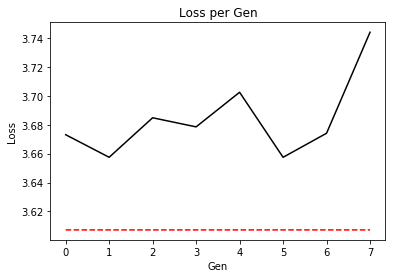

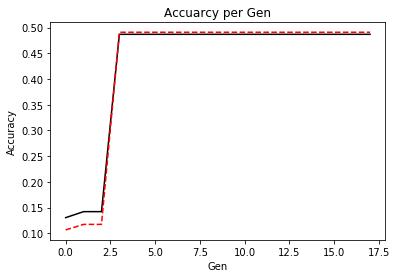

In [541]:
plt.plot(train_loss_hist[10:40], 'k-', label='Train Loss')
plt.plot(test_loss_hist[10:40], 'r--', label='Test Loss')
plt.title('Loss per Gen')
plt.xlabel('Gen')
plt.ylabel('Loss')
plt.show()


#plotting accuracy
plt.plot(train_acc, 'k-', label='Train acc')
plt.plot(test_acc, 'r--', label='Test acc')
plt.title('Accuarcy per Gen')
plt.xlabel('Gen')
plt.ylabel('Accuracy')
plt.show()
